# Upload Dataset

In [1]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install scipy
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from SCRIPTS.A_data_collection import make_dataset_for_regression
#The number of informative features, i.e., the number of features used to build the linear model used to generate the output.
X, y = make_dataset_for_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, seed=2023)
print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


# Data analysis
Try to understand duplicates, range of values, functional dependencies

In [3]:
import pandas as pd

df = pd.DataFrame(X)
print(df.head())

          0         1         2         3         4         5         6  \
0 -1.687523  1.162717 -0.533602 -0.628703 -0.829337  0.042886  0.344324   
1 -1.020632 -0.220116 -0.869748  1.966181  0.835520 -0.296532  0.869868   
2  0.523867 -1.125007  0.085100  0.323081  0.598603  2.014563  0.827047   
3 -0.762037  0.471784 -0.558538 -0.813294  0.039496 -0.577744  0.756322   
4 -0.082485 -1.466384 -0.212735 -1.422577 -1.848497 -0.464045  1.178404   

          7         8         9  
0  0.724020 -1.314765 -0.475478  
1  0.196561  0.281992 -0.401782  
2  0.397878 -0.820872 -0.063909  
3  0.423918  0.886604 -2.272658  
4 -1.065657 -1.367547 -2.501120  


In [4]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

### Single column analysis

In [5]:
distinct_values=df[0].nunique()
print(distinct_values)

1000


In [6]:
mean_values = df.mean()
std_values = df.std()

print("Mean values:")
print(mean_values)

print("Standard deviation values:")
print(std_values)


Mean values:
0    0.005780
1   -0.031556
2   -0.016019
3    0.036449
4   -0.023135
5   -0.001820
6   -0.026303
7    0.007726
8    0.018629
9    0.092134
dtype: float64
Standard deviation values:
0    0.991113
1    0.975035
2    0.982018
3    1.023308
4    0.966829
5    1.022371
6    0.987888
7    0.972030
8    1.026852
9    1.001554
dtype: float64


# Data pollution

## Generate a complete random pollution function

In [7]:

# List of names
names = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack','John', 'Kate', 'Larry', 'Michael', 'Nancy', 'Oliver', 'Pete', 'Robert', 'Susan', 'Tom']

# List of surnames
surnames = ['Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 'Wilson', 'Moore', 'Taylor']


In [8]:
import pandas as pd
import numpy as np
import random

def random_pollution(dataset, percentage):
    polluted_dataset = dataset.copy()
    num_features_affected = int(len(dataset.columns) * percentage)
    random_indices = np.random.choice(len(dataset.columns), num_features_affected, replace=False)

    for idx in random_indices:
        column_name = dataset.columns[idx]
        #if data_type == 'numeric':
        if np.issubdtype(dataset[column_name].dtype, np.number):
            # Convert numeric feature to categorical or boolean
            prob= np.random.rand()
            if prob < 0.2:
                polluted_dataset[column_name] = np.random.choice(['red', 'green', 'blue','purple','orange','yellow','grey','white','black','pink'], size=len(dataset))
            elif prob < 0.4:
                polluted_dataset[column_name] = np.random.choice([True, False], size=len(dataset))
            elif prob < 0.6:
                polluted_dataset[column_name] = np.random.choice(names, size=len(dataset))
            elif prob < 0.8:
                polluted_dataset[column_name] = np.random.choice(100, size=len(dataset))
            else:
                polluted_dataset[column_name] = np.random.choice(surnames, size=len(dataset))

    return polluted_dataset

polluted_dataset = random_pollution(df, 0.5)
print(polluted_dataset.head())

          0   1         2   3   4         5         6   7         8      9
0 -1.687523  17 -0.533602  11  44  0.042886  0.344324  76 -1.314765   True
1 -1.020632   1 -0.869748  37  88 -0.296532  0.869868   7  0.281992  False
2  0.523867  99  0.085100  71  59  2.014563  0.827047  60 -0.820872  False
3 -0.762037  80 -0.558538  95  19 -0.577744  0.756322  32  0.886604   True
4 -0.082485  99 -0.212735  56  48 -0.464045  1.178404  39 -1.367547  False


## Generate a pollution function according dataset values

In [9]:
def map_value_to_color(value):
    if value >= 0 and value < 0.1:
        return 'blue'
    elif value >= 0.1 and value < 0.2:
        return 'red'
    # Add more conditions for other ranges and corresponding colors
    elif value >= 0.2 and value < 0.3:
        return 'green'
    elif value >= 0.3 and value < 0.4:
        return 'purple'
    elif value >= 0.4 and value < 0.5:
        return 'yellow'
    elif value >= 0.5 and value < 0.6:
        return 'orange'
    elif value >= 0.6 and value < 0.7:
        return 'pink'
    elif value >= 0.7 and value < 0.8:
        return 'grey'
    elif value >= 0.8 and value < 0.9:
        return 'white'
    else:
        return 'black'


In [10]:
def map_value_to_name(value):
    if value >= 0 and value < 0.2:
        return 'Alice'
    elif value >= 0.2 and value < 0.4:
        return 'Charlie'
    elif value >= 0.4 and value < 0.6:
        return 'David'
    elif value >= 0.6 and value < 0.8:
        return 'Eve'
    else:
        return 'Frank'

In [11]:
def map_to_boolean(value):
    if value >= 0 and value < 0.5:
        return True
    else:
        return False

In [12]:
def map_to_surname(value):
    if value >= 0 and value < 0.2:
        return 'Smith'
    elif value >= 0.2 and value < 0.4:
        return 'Johnson'
    elif value >= 0.4 and value < 0.6:
        return 'Williams'
    elif value >= 0.6 and value < 0.8:
        return 'Jones'
    else:
        return 'Brown'

In [13]:
num=0.145
print(int(round(num, 2)*100))

14


In [14]:
def map_to_integer(value):
    return int(round(value, 2)*100)

Scaling values before injecting pollution is crucial as it aids in the construction of the pollution function because I want to ensure that the function behaves consistently across different ranges of values. If data isn't scaled, the same amount of "pollution" could have a big impact on smaller values and a small impact on larger values. This could lead to inconsistent results and make it harder to understand the effects of the pollution.

In [15]:
from sklearn.preprocessing import MinMaxScaler
def range_based_pollution(dataset, percentage):
    num_features_affected = int(len(dataset.columns) * percentage)
    random_indices = np.random.choice(len(dataset.columns), num_features_affected, replace=False)
    random_indices = np.sort(random_indices)
    # Copy the dataset to avoid modifying the original dataset
    polluted_dataset = dataset.copy()

    # Scale only the columns in random_indices
    scaler=MinMaxScaler()
    columns_to_scale = polluted_dataset.columns[random_indices]
    polluted_dataset[columns_to_scale] = scaler.fit_transform(polluted_dataset[columns_to_scale])

    name_counter = 1
    surname_counter = 1
    names_columns = []
    surnames_columns = []

    for idx in random_indices:
        # Generate an integer random number between 0 and 3
        random_number = random.randint(0, 4)
        column = polluted_dataset.columns[idx]
        if random_number == 0:
            polluted_dataset[column] = polluted_dataset[column].apply(map_value_to_color)
        elif random_number == 1:
            new_column_name = 'names' + str(name_counter)
            polluted_dataset[column] = polluted_dataset[column].apply(map_value_to_name)
            polluted_dataset.rename(columns={column: new_column_name}, inplace=True)
            names_columns.append(new_column_name)
            name_counter += 1
        elif random_number == 2:
            polluted_dataset[column] = polluted_dataset[column].apply(map_to_boolean)
        elif random_number == 3:
            polluted_dataset[column] = polluted_dataset[column].apply(map_to_integer)
        else:
            new_column_name = 'surnames' + str(surname_counter)
            polluted_dataset[column] = polluted_dataset[column].apply(map_to_surname)
            polluted_dataset.rename(columns={column: new_column_name}, inplace=True)
            surnames_columns.append(new_column_name)
            surname_counter += 1
        
    print(polluted_dataset.dtypes)

    if names_columns and surnames_columns:
        # Concatenate all 'names' columns together
        polluted_dataset['names'] = polluted_dataset[names_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Concatenate all 'surnames' columns together
        polluted_dataset['surnames'] = polluted_dataset[surnames_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Create 'full_name' column by concatenating 'names' and 'surnames' columns
        polluted_dataset['full_name'] = polluted_dataset['names'] + ' ' + polluted_dataset['surnames']
        
    return polluted_dataset

polluted_dataset = range_based_pollution(df, 0.3)
print(polluted_dataset.head())

0            float64
1               bool
2            float64
3            float64
4            float64
5            float64
6            float64
surnames1     object
names1        object
9            float64
dtype: object
          0      1         2         3         4         5         6  \
0 -1.687523  False -0.533602 -0.628703 -0.829337  0.042886  0.344324   
1 -1.020632   True -0.869748  1.966181  0.835520 -0.296532  0.869868   
2  0.523867   True  0.085100  0.323081  0.598603  2.014563  0.827047   
3 -0.762037  False -0.558538 -0.813294  0.039496 -0.577744  0.756322   
4 -0.082485   True -0.212735 -1.422577 -1.848497 -0.464045  1.178404   

  surnames1   names1         9    names  surnames         full_name  
0  Williams  Charlie -0.475478  Charlie  Williams  Charlie Williams  
1  Williams    David -0.401782    David  Williams    David Williams  
2  Williams  Charlie -0.063909  Charlie  Williams  Charlie Williams  
3  Williams      Eve -2.272658      Eve  Williams      Eve Will

## Statistics of the polluted dataset

In [16]:
for idx in range(len(polluted_dataset.columns)):
    print(polluted_dataset.iloc[:, idx].value_counts())
    distinct_values = (polluted_dataset.iloc[:, idx].nunique())
    print(distinct_values)
    if distinct_values < 15:
        print(polluted_dataset.iloc[:, idx].value_counts())
    else:
        print("Too many distinct values to print")
    uniqueness = distinct_values / len(polluted_dataset)
    print("Uniqueness: ", uniqueness)
    print ('min:', polluted_dataset.iloc[:, idx].min())
    print ('max:', polluted_dataset.iloc[:, idx].max())
    print ('mode:', polluted_dataset.iloc[:, idx].mode()[0])

0
-1.687523    1
-0.771916    1
 0.056629    1
 2.256737    1
-0.455979    1
            ..
-1.649683    1
-0.797178    1
-0.325989    1
 0.037820    1
-1.127951    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -3.2082926855229754
max: 3.279456552430336
mode: -3.2082926855229754
1
False    543
True     457
Name: count, dtype: int64
2
1
False    543
True     457
Name: count, dtype: int64
Uniqueness:  0.002
min: False
max: True
mode: False
2
-0.533602    1
-0.339426    1
-1.270515    1
 0.350229    1
-0.079330    1
            ..
 0.247250    1
 1.868609    1
-0.529002    1
-0.483982    1
 0.775350    1
Name: count, Length: 1000, dtype: int64
1000
Too many distinct values to print
Uniqueness:  1.0
min: -2.7560789184319727
max: 3.412176776324521
mode: -2.7560789184319727
3
-0.628703    1
-0.132170    1
-1.702866    1
 0.799889    1
-0.115062    1
            ..
-0.836954    1
-0.758316    1
 1.422128    1
-0.291956    1
 0.454633   

In [17]:
#import libraries and set up
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

### Statistics of injected value

1
False    543
True     457
Name: count, dtype: int64


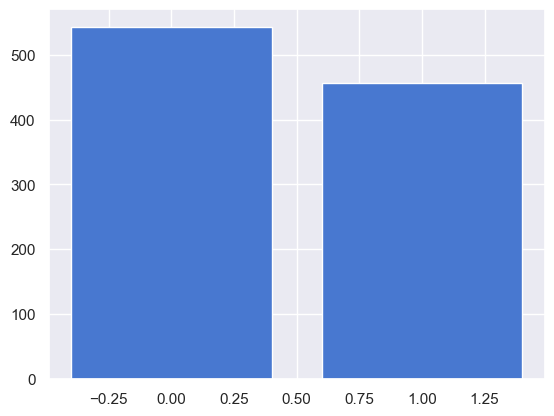

surnames1
Williams    481
Johnson     282
Jones       184
Smith        36
Brown        17
Name: count, dtype: int64


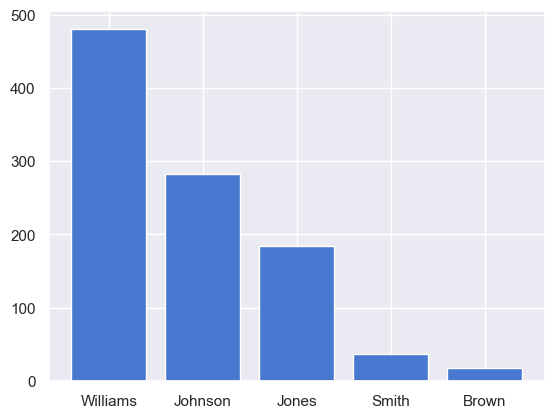

names1
David      476
Eve        261
Charlie    213
Frank       28
Alice       22
Name: count, dtype: int64


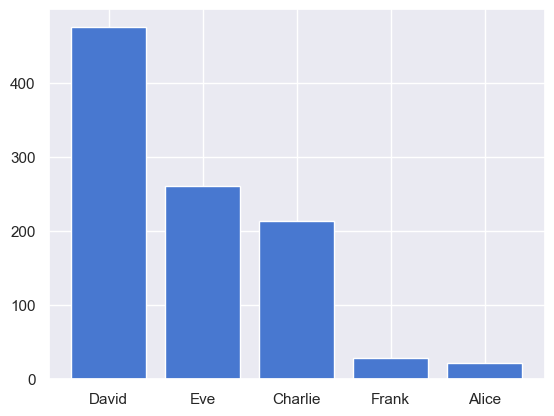

names
David      476
Eve        261
Charlie    213
Frank       28
Alice       22
Name: count, dtype: int64


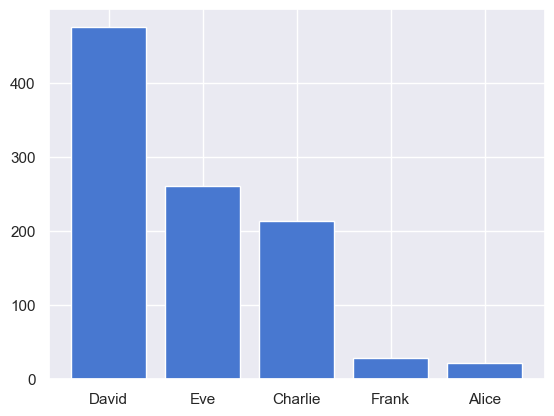

surnames
Williams    481
Johnson     282
Jones       184
Smith        36
Brown        17
Name: count, dtype: int64


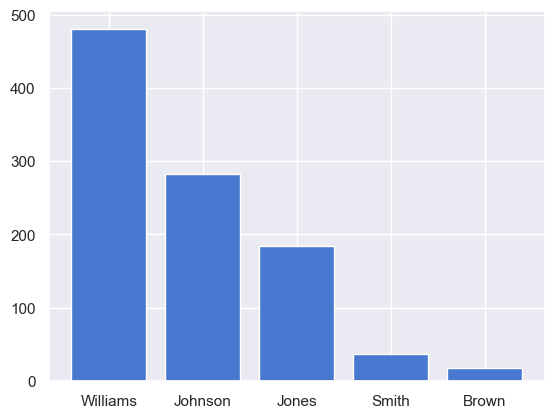

full_name
David Williams      229
David Johnson       135
Eve Williams        119
Charlie Williams    115
David Jones          83
Eve Johnson          77
Charlie Johnson      52
Eve Jones            52
Charlie Jones        38
David Smith          21
Frank Johnson        13
Alice Williams       10
Frank Williams        8
David Brown           8
Eve Brown             7
Eve Smith             6
Charlie Smith         6
Alice Jones           6
Frank Jones           5
Alice Johnson         5
Frank Smith           2
Charlie Brown         2
Alice Smith           1
Name: count, dtype: int64


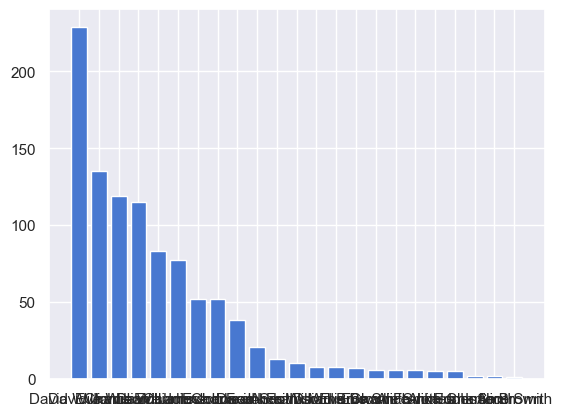

In [18]:
import matplotlib.pyplot as plt

# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if not np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        # Get the counts of each unique value in the column
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a bar plot of the counts
        plt.bar(value_counts.index, value_counts.values)

        # Show the plot
        plt.show()


These values reflect the value distribution shown below

### Statistics of numerical value

0
-1.687523    1
-0.771916    1
 0.056629    1
 2.256737    1
-0.455979    1
            ..
-1.649683    1
-0.797178    1
-0.325989    1
 0.037820    1
-1.127951    1
Name: count, Length: 1000, dtype: int64


2
-0.533602    1
-0.339426    1
-1.270515    1
 0.350229    1
-0.079330    1
            ..
 0.247250    1
 1.868609    1
-0.529002    1
-0.483982    1
 0.775350    1
Name: count, Length: 1000, dtype: int64
3
-0.628703    1
-0.132170    1
-1.702866    1
 0.799889    1
-0.115062    1
            ..
-0.836954    1
-0.758316    1
 1.422128    1
-0.291956    1
 0.454633    1
Name: count, Length: 1000, dtype: int64
4
-0.829337    1
 0.485151    1
 1.510059    1
 0.146729    1
-0.504873    1
            ..
 0.175960    1
 1.723980    1
-0.275888    1
 0.744997    1
 0.279408    1
Name: count, Length: 1000, dtype: int64
5
 0.042886    1
 0.849099    1
-0.213393    1
 0.130175    1
-2.248118    1
            ..
-0.747281    1
-0.467083    1
 1.200599    1
-1.224057    1
 0.514210    1
Name: count, Length: 1000, dtype: int64
6
 0.344324    1
-1.040190    1
 0.748504    1
 0.862092    1
-1.246897    1
            ..
-0.009006    1
-1.411160    1
 0.799744    1
 1.752756    1
-0.568916    1
Name:

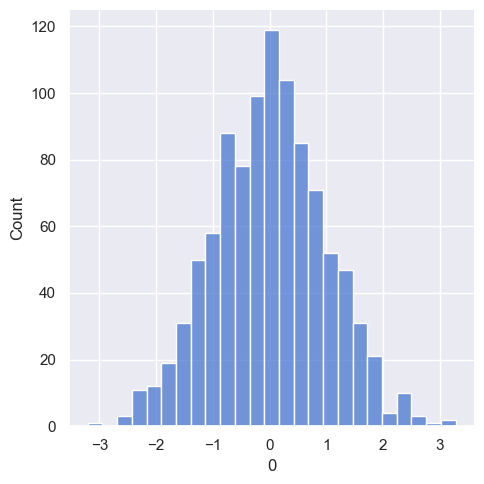

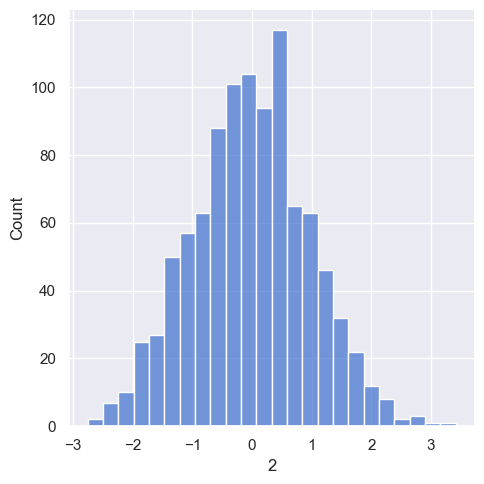

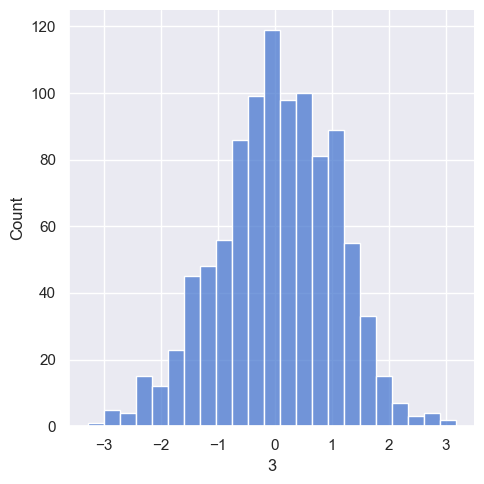

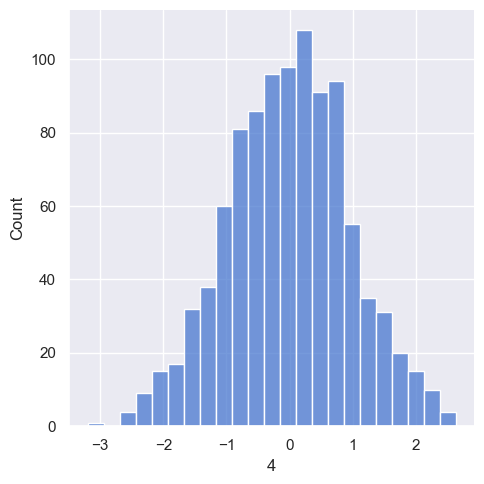

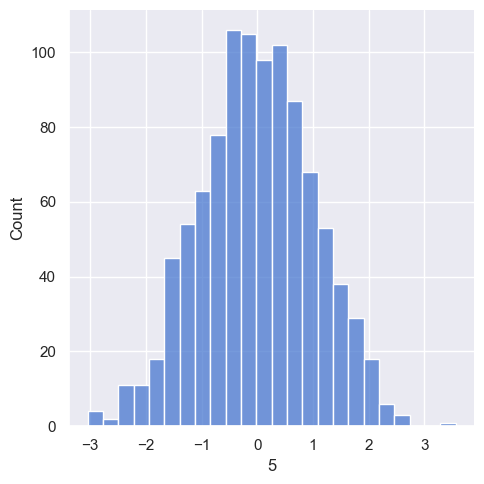

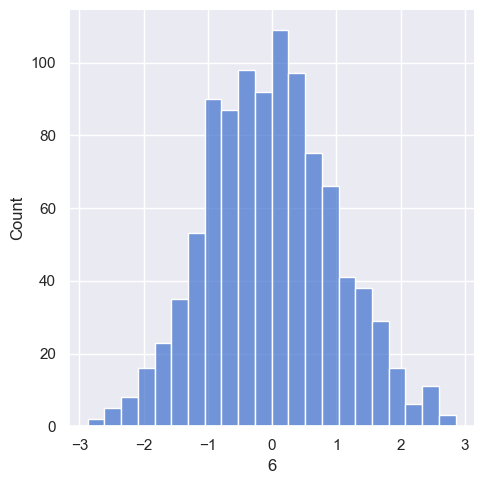

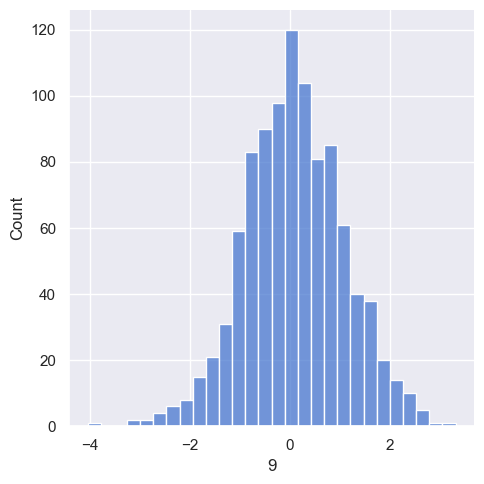

In [19]:
# Loop over each column
for column_name in polluted_dataset.columns:
    # Check if the column is non-numeric
    if np.issubdtype(polluted_dataset[column_name].dtype, np.number):
        value_counts = polluted_dataset[column_name].value_counts()
        print(value_counts)
        # Create a histogram of the column values
        sns.displot(polluted_dataset[column_name])


# Results

## Random pollution

In [40]:
random_results=[]
percentages=[i/10 for i in range(1, 11)]
percentages

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
from SCRIPTS.D_data_analysis import regression, encoding_categorical_variables
from SCRIPTS.E_plot_results import plot

for percentage in percentages:
    # REGRESSION EXAMPLE
        # (in this toy example, I simply created 10 datasets with respectively 1000,1001,1002,1003,1004,1005,1006,1007,1008,1009 number of samples
        # and I generated the three plots for the evaluation of the results)
    results_for_each_algorithm = []
    REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","GPRegressor","SVMRegressor","KNNRegressor","MLPRegressor"]
    SEED = 2023
    for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for i in range(0,10):  # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
            # DATA COLLECTION
            X, y = make_dataset_for_regression(n_samples=1000+i*100, n_features=12, n_informative=4, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=20.0, seed=2023)
            # DATA POLLUTION
            df = pd.DataFrame(X)
            df = random_pollution(df, percentage)
            #df = range_based_pollution(df, 0.6)
            df.columns = df.columns.astype(str)
            df = encoding_categorical_variables(df)
            # DATA ANALYSIS
            results_1_analysis = regression(df, y, algorithm, SEED)
            results_single_algorithm.append(results_1_analysis)

        results_for_each_algorithm.append(results_single_algorithm)
        
    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
    x_axis_values = [1000 + i * 100 for i in range(10)]
    print(x_axis_values)

    plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Performance "+str(percentage), algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
    plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Distance train-test "+str(percentage), algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
    plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Speed "+str(percentage), algorithms=REGRESSION_ALGORITHMS, plot_type="speed")
    random_results.append(results_for_each_algorithm)

### Plot summary graph

In [42]:
len(random_results)

10

10 are the different percentage

In [45]:
len(random_results[0])

6

6 are the regression algorithms

In [46]:
len(random_results[0][0])

10

10 are the different combination of number of samples

In [54]:
len(random_results[0][0][0])

3

3 performance, speed and distance train-test

In [55]:
random_results[0][0][0]

{'mean_perf': 60.277647278290694,
 'distance': 1.8541855203920585,
 'speed': 0.01482081413269043}

In [62]:
import numpy as np

# Initialize an empty list to hold the performance scores
performance_scores = []
random_results = np.array(random_results)
# Loop through each element in the random_results array
for i in range(random_results.shape[0]):
    for j in range(random_results.shape[1]):
        # Extract the 'mean_perf' value from the dictionary and append it to the list
        performance_scores.append([random_results[i, j, k]['mean_perf'] for k in range(random_results.shape[2])])

# Convert the list to a numpy array
performance_scores = np.array(performance_scores)

# Calculate the mean along the last axis to get the average performance score for each algorithm and percentage
avg_scores_performance = np.mean(performance_scores, axis=-1)

print(avg_scores_performance.shape)

(60,)


In [63]:
# Reshape the avg_scores_performance array to have a shape of (10, 6)
avg_scores_performance = avg_scores_performance.reshape((10, 6))

print(avg_scores_performance.shape)

(10, 6)


In [68]:
import numpy as np

# Initialize an empty list to hold the scores for each metric
performance_scores = []
distance_scores = []
speed_scores = []

# Loop through each element in the random_results array
for i in range(random_results.shape[0]):
    for j in range(random_results.shape[1]):
        # Extract the values for each metric from the dictionary and append them to the respective list
        performance_scores.append([random_results[i, j, k]['mean_perf'] for k in range(random_results.shape[2])])
        distance_scores.append([random_results[i, j, k]['distance'] for k in range(random_results.shape[2])])
        speed_scores.append([random_results[i, j, k]['speed'] for k in range(random_results.shape[2])])

# Convert the lists to numpy arrays
performance_scores = np.array(performance_scores)
distance_scores = np.array(distance_scores)
speed_scores = np.array(speed_scores)

# Calculate the mean along the last axis to get the average score for each metric, algorithm, and percentage
avg_performance_scores = np.mean(performance_scores, axis=-1)
avg_distance_scores = np.mean(distance_scores, axis=-1)
avg_speed_scores = np.mean(speed_scores, axis=-1)

# Reshape the average score arrays to have a shape of (10, 6)
avg_performance_scores = avg_performance_scores.reshape((10, 6))
avg_distance_scores = avg_distance_scores.reshape((10, 6))
avg_speed_scores = avg_speed_scores.reshape((10, 6))

# Create a new 2D array with shape (10, 6) where each element is a dictionary containing the average scores for 'mean_perf', 'distance', and 'speed'
avg_scores = np.empty((10, 6), dtype=object)
for i in range(10):
    for j in range(6):
        avg_scores[i, j] = {'mean_perf': avg_performance_scores[i, j], 'distance': avg_distance_scores[i, j], 'speed': avg_speed_scores[i, j]}

print(avg_scores.shape)

(10, 6)


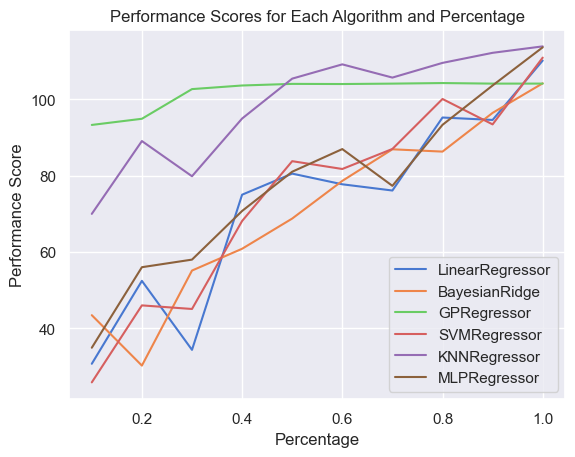

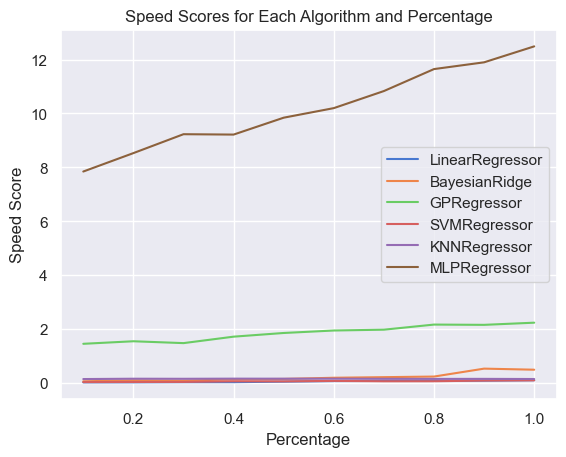

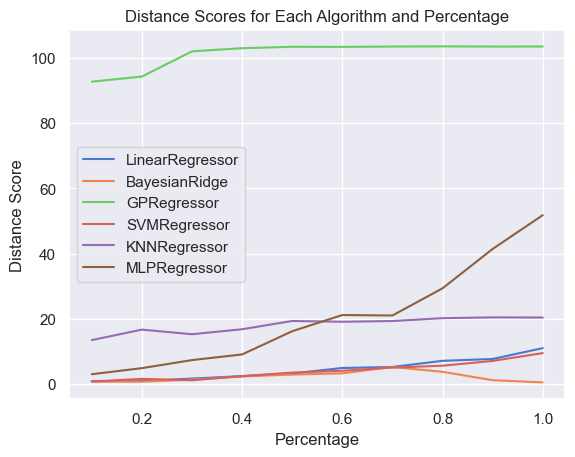

In [74]:
import matplotlib.pyplot as plt

# Define the percentages and algorithms
percentages=[i/10 for i in range(1, 11)]
algorithms = REGRESSION_ALGORITHMS

# Create three new figures and axes for each metric
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

# Loop through each algorithm
for i,algorithm in enumerate(algorithms):
    # Extract the average scores for each metric from the avg_scores array
    performance_scores = [avg_scores[j, i]['mean_perf'] for j in range(10)]
    speed_scores = [avg_scores[j, i]['speed'] for j in range(10)]
    distance_scores = [avg_scores[j, i]['distance'] for j in range(10)]
    
    # Plot the average scores against the percentages
    ax1.plot(percentages, performance_scores, label=algorithms[i])
    ax2.plot(percentages, speed_scores, label=algorithms[i])
    ax3.plot(percentages, distance_scores, label=algorithms[i])

# Add a legend, title, and labels to each plot
ax1.legend()
ax1.set_title('Performance Scores for Each Algorithm and Percentage')
ax1.set_xlabel('Percentage')
ax1.set_ylabel('Performance Score')

ax2.legend()
ax2.set_title('Speed Scores for Each Algorithm and Percentage')
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Speed Score')

ax3.legend()
ax3.set_title('Distance Scores for Each Algorithm and Percentage')
ax3.set_xlabel('Percentage')
ax3.set_ylabel('Distance Score')

# Display the plots
plt.show()
# Save the plots as image files
fig1.savefig('performance_scores.png')
fig2.savefig('speed_scores.png')
fig3.savefig('distance_scores.png')

## Range based pollution

In [75]:
rb_results=[]
percentages=[i/10 for i in range(1, 11)]
percentages

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
from SCRIPTS.D_data_analysis import regression, encoding_categorical_variables
from SCRIPTS.E_plot_results import plot

for percentage in percentages:
    # REGRESSION EXAMPLE
        # (in this toy example, I simply created 10 datasets with respectively 1000,1001,1002,1003,1004,1005,1006,1007,1008,1009 number of samples
        # and I generated the three plots for the evaluation of the results)
    results_for_each_algorithm = []
    REGRESSION_ALGORITHMS = ["LinearRegressor","BayesianRidge","GPRegressor","SVMRegressor","KNNRegressor","MLPRegressor"]
    SEED = 2023
    for algorithm in REGRESSION_ALGORITHMS:  # FIRST CICLE ON THE ALGORITHMS

        results_single_algorithm = []

        for i in range(0,10):  # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
            # DATA COLLECTION
            X, y = make_dataset_for_regression(n_samples=1000+i*100, n_features=12, n_informative=4, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=20.0, seed=2023)
            # DATA POLLUTION
            df = pd.DataFrame(X)
            #df = random_pollution(df, percentage)
            df = range_based_pollution(df, percentage)
            df.columns = df.columns.astype(str)
            df = encoding_categorical_variables(df)
            # DATA ANALYSIS
            results_1_analysis = regression(df, y, algorithm, SEED)
            results_single_algorithm.append(results_1_analysis)

        results_for_each_algorithm.append(results_single_algorithm)
        
    # RESULTS EVALUATION
    # EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
    x_axis_values = [1000 + i * 100 for i in range(10)]
    print(x_axis_values)

    plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Performance "+str(percentage), algorithms=REGRESSION_ALGORITHMS, plot_type="performance")
    plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Distance train-test "+str(percentage), algorithms=REGRESSION_ALGORITHMS, plot_type="distance train-test")
    plot(x_axis_values, x_label="Number of samples", results=results_for_each_algorithm,title="Speed "+str(percentage), algorithms=REGRESSION_ALGORITHMS, plot_type="speed")
    rb_results.append(results_for_each_algorithm)

In [78]:
import numpy as np

# Initialize an empty list to hold the performance scores
performance_scores = []
rb_results=np.array(rb_results)
# Loop through each element in the random_results array
for i in range(rb_results.shape[0]):
    for j in range(rb_results.shape[1]):
        # Extract the 'mean_perf' value from the dictionary and append it to the list
        performance_scores.append([rb_results[i, j, k]['mean_perf'] for k in range(rb_results.shape[2])])

# Convert the list to a numpy array
performance_scores = np.array(performance_scores)

# Calculate the mean along the last axis to get the average performance score for each algorithm and percentage
avg_scores_performance = np.mean(performance_scores, axis=-1)

print(avg_scores_performance.shape)

(60,)


In [79]:
# Reshape the avg_scores_performance array to have a shape of (10, 6)
avg_scores_performance = avg_scores_performance.reshape((10, 6))

print(avg_scores_performance.shape)

(10, 6)


In [80]:
import numpy as np

# Initialize an empty list to hold the scores for each metric
performance_scores = []
distance_scores = []
speed_scores = []

# Loop through each element in the random_results array
for i in range(rb_results.shape[0]):
    for j in range(rb_results.shape[1]):
        # Extract the values for each metric from the dictionary and append them to the respective list
        performance_scores.append([rb_results[i, j, k]['mean_perf'] for k in range(rb_results.shape[2])])
        distance_scores.append([rb_results[i, j, k]['distance'] for k in range(rb_results.shape[2])])
        speed_scores.append([rb_results[i, j, k]['speed'] for k in range(rb_results.shape[2])])

# Convert the lists to numpy arrays
performance_scores = np.array(performance_scores)
distance_scores = np.array(distance_scores)
speed_scores = np.array(speed_scores)

# Calculate the mean along the last axis to get the average score for each metric, algorithm, and percentage
avg_performance_scores = np.mean(performance_scores, axis=-1)
avg_distance_scores = np.mean(distance_scores, axis=-1)
avg_speed_scores = np.mean(speed_scores, axis=-1)

# Reshape the average score arrays to have a shape of (10, 6)
avg_performance_scores = avg_performance_scores.reshape((10, 6))
avg_distance_scores = avg_distance_scores.reshape((10, 6))
avg_speed_scores = avg_speed_scores.reshape((10, 6))

# Create a new 2D array with shape (10, 6) where each element is a dictionary containing the average scores for 'mean_perf', 'distance', and 'speed'
avg_scores = np.empty((10, 6), dtype=object)
for i in range(10):
    for j in range(6):
        avg_scores[i, j] = {'mean_perf': avg_performance_scores[i, j], 'distance': avg_distance_scores[i, j], 'speed': avg_speed_scores[i, j]}

print(avg_scores.shape)

(10, 6)


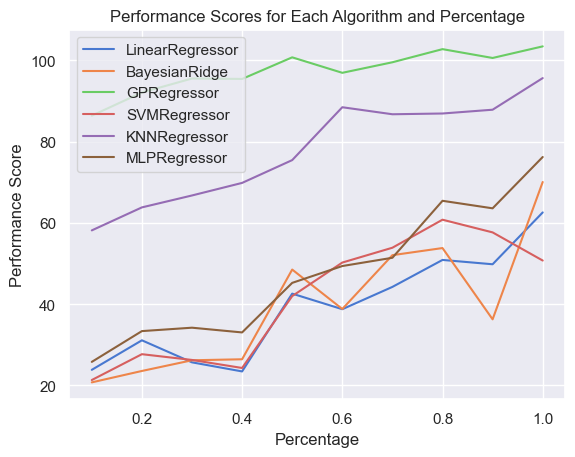

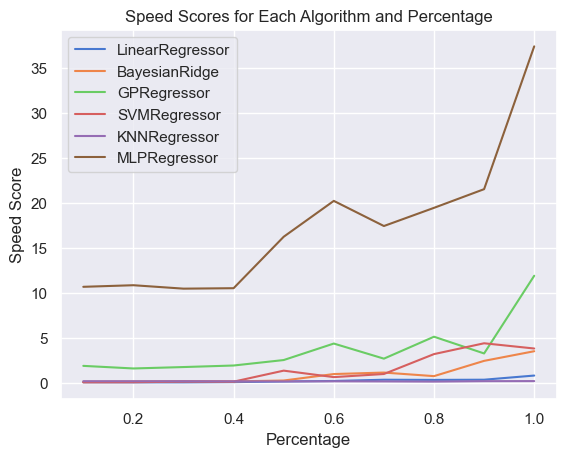

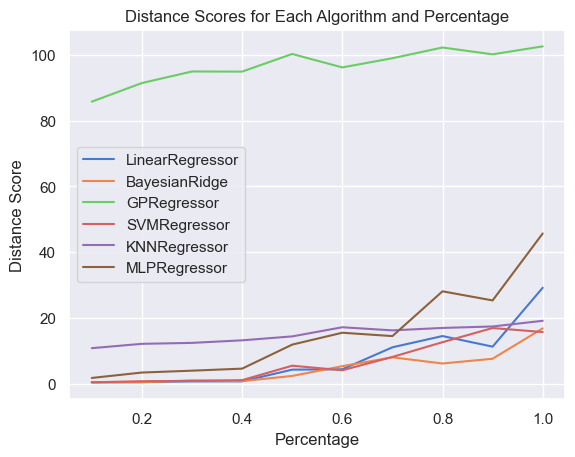

In [81]:
import matplotlib.pyplot as plt

# Define the percentages and algorithms
percentages=[i/10 for i in range(1, 11)]
algorithms = REGRESSION_ALGORITHMS

# Create three new figures and axes for each metric
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

# Loop through each algorithm
for i,algorithm in enumerate(algorithms):
    # Extract the average scores for each metric from the avg_scores array
    performance_scores = [avg_scores[j, i]['mean_perf'] for j in range(10)]
    speed_scores = [avg_scores[j, i]['speed'] for j in range(10)]
    distance_scores = [avg_scores[j, i]['distance'] for j in range(10)]
    
    # Plot the average scores against the percentages
    ax1.plot(percentages, performance_scores, label=algorithms[i])
    ax2.plot(percentages, speed_scores, label=algorithms[i])
    ax3.plot(percentages, distance_scores, label=algorithms[i])

# Add a legend, title, and labels to each plot
ax1.legend()
ax1.set_title('Performance Scores for Each Algorithm and Percentage')
ax1.set_xlabel('Percentage')
ax1.set_ylabel('Performance Score')

ax2.legend()
ax2.set_title('Speed Scores for Each Algorithm and Percentage')
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Speed Score')

ax3.legend()
ax3.set_title('Distance Scores for Each Algorithm and Percentage')
ax3.set_xlabel('Percentage')
ax3.set_ylabel('Distance Score')

# Display the plots
plt.show()
# Save the plots as image files
fig1.savefig('performance_scores.png')
fig2.savefig('speed_scores.png')
fig3.savefig('distance_scores.png')